## Training of CIFAR-10 using 110-layer ResNet with stochastic depth

In [ ]:
import tensorflow as tf
import numpy as np
from utils.neuralnets.StochasticNet110 import StochasticNet110
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Input,Flatten,Dense
from tensorflow.keras import Model

In [2]:
##load data and standardize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_test,axis=0))/np.std(x_test,axis=0)
##train validation split, 45000 for training and 5000 for validation
np.random.seed(42)
mask_val = np.random.choice(50000,5000,replace=False)
mask_train = np.array([i for i in range(50000) if i not in mask_val])
x_val, y_val = x_train[mask_val], y_train[mask_val]
x_train, y_train = x_train[mask_train], y_train[mask_train]

In [3]:
##data augmentation
##augmented with horizontal flip,random erasing and random shift by 0.1
batch_size = 128
datagen_for_train = ImageDataGenerator(horizontal_flip=True,width_shift_range= 4, height_shift_range= 4)
# datagen_for_train = ImageDataGenerator()
datagen_for_test = ImageDataGenerator()
train_data = datagen_for_train.flow(x_train,y_train,batch_size=batch_size)
validation_data = datagen_for_test.flow(x_val, y_val, batch_size=batch_size)

In [4]:
##create a ResNet110 model
input_shape = x_train.shape[1:]
num_class = 10
model = StochasticNet110(input_shape=input_shape,num_class=num_class,p_L=0.5)

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


epochs = 200
history = [[],[],[]]
time_0 = time.time()
for epoch in range(epochs):
    print("Epoch %d/%d" % (epoch+1,epochs))
    if (epoch==100) | (epoch==150):
        optimizer.learning_rate = optimizer.learning_rate/10
    
    start_time = time.time()
    step = 0
    for x_batch_train, y_batch_train in train_data:
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        train_acc_metric.update_state(y_batch_train, logits)
        if step % 100 == 0:
            print(
                "Training loss at step %d: %.4f"
                % (step, float(loss_value))
            )
        step += 1
        if step > len(x_train)/batch_size:
            break

    history[0].append(loss_value)
    train_acc = train_acc_metric.result()
    train_acc_metric.reset_states()
    
    step = 0
    for x_batch_val, y_batch_val in validation_data:
        val_logits = model(x_batch_val, training=False)
        val_acc_metric.update_state(y_batch_val, val_logits)
        step += 1
        if step > len(x_val)/batch_size:
            break
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    history[1].append(train_acc)
    history[2].append(val_acc)
    print("Training accuracy: %.4f" % (float(train_acc),)
          ,"Validation accuracy: %.4f" % (float(val_acc),),"Time taken: %.2fs" % (time.time() - start_time))
total_time=time.time()-time_0

Epoch 1/200
Training loss at step 0: 10.0834
Training loss at step 100: 2.4759
Training loss at step 200: 2.3316
Training loss at step 300: 1.9350
Training accuracy: 0.1780 Validation accuracy: 0.1938 Time taken: 113.31s
Epoch 2/200
Training loss at step 0: 2.2369
Training loss at step 100: 2.1650
Training loss at step 200: 1.7367
Training loss at step 300: 1.7610
Training accuracy: 0.2849 Validation accuracy: 0.3144 Time taken: 110.06s
Epoch 3/200
Training loss at step 0: 1.8301
Training loss at step 100: 1.6720
Training loss at step 200: 1.8505
Training loss at step 300: 1.8446
Training accuracy: 0.3460 Validation accuracy: 0.3492 Time taken: 110.71s
Epoch 4/200
Training loss at step 0: 1.6876
Training loss at step 100: 1.6152
Training loss at step 200: 1.5658
Training loss at step 300: 1.6877
Training accuracy: 0.3960 Validation accuracy: 0.3010 Time taken: 110.74s
Epoch 5/200
Training loss at step 0: 1.4059
Training loss at step 100: 1.5422
Training loss at step 200: 1.3237
Trainin

Training loss at step 100: 0.4981
Training loss at step 200: 0.6194
Training loss at step 300: 0.5166
Training accuracy: 0.8033 Validation accuracy: 0.7444 Time taken: 109.07s
Epoch 39/200
Training loss at step 0: 0.5662
Training loss at step 100: 0.6729
Training loss at step 200: 0.4938
Training loss at step 300: 0.3967
Training accuracy: 0.8067 Validation accuracy: 0.7812 Time taken: 108.87s
Epoch 40/200
Training loss at step 0: 0.5644
Training loss at step 100: 0.6582
Training loss at step 200: 0.6305
Training loss at step 300: 0.3041
Training accuracy: 0.8106 Validation accuracy: 0.7792 Time taken: 108.42s
Epoch 41/200
Training loss at step 0: 0.6007
Training loss at step 100: 0.5437
Training loss at step 200: 0.4777
Training loss at step 300: 0.6580
Training accuracy: 0.8130 Validation accuracy: 0.7762 Time taken: 110.09s
Epoch 42/200
Training loss at step 0: 0.4132
Training loss at step 100: 0.5441
Training loss at step 200: 0.5301
Training loss at step 300: 0.5395
Training accur

Training loss at step 200: 0.4669
Training loss at step 300: 0.3328
Training accuracy: 0.8786 Validation accuracy: 0.8440 Time taken: 109.52s
Epoch 76/200
Training loss at step 0: 0.5956
Training loss at step 100: 0.3763
Training loss at step 200: 0.4187
Training loss at step 300: 0.2540
Training accuracy: 0.8794 Validation accuracy: 0.8558 Time taken: 109.55s
Epoch 77/200
Training loss at step 0: 0.2894
Training loss at step 100: 0.3724
Training loss at step 200: 0.3807
Training loss at step 300: 0.4112
Training accuracy: 0.8804 Validation accuracy: 0.8276 Time taken: 110.10s
Epoch 78/200
Training loss at step 0: 0.4289
Training loss at step 100: 0.2349
Training loss at step 200: 0.8506
Training loss at step 300: 0.4190
Training accuracy: 0.8822 Validation accuracy: 0.7990 Time taken: 110.17s
Epoch 79/200
Training loss at step 0: 0.3333
Training loss at step 100: 0.2652
Training loss at step 200: 0.3002
Training loss at step 300: 0.2960
Training accuracy: 0.8849 Validation accuracy: 0

Training loss at step 300: 0.2072
Training accuracy: 0.9261 Validation accuracy: 0.8904 Time taken: 108.94s
Epoch 113/200
Training loss at step 0: 0.3134
Training loss at step 100: 0.1836
Training loss at step 200: 0.3500
Training loss at step 300: 0.2698
Training accuracy: 0.9232 Validation accuracy: 0.8946 Time taken: 108.22s
Epoch 114/200
Training loss at step 0: 0.3235
Training loss at step 100: 0.1778
Training loss at step 200: 0.2153
Training loss at step 300: 0.1986
Training accuracy: 0.9241 Validation accuracy: 0.8904 Time taken: 108.54s
Epoch 115/200
Training loss at step 0: 0.2356
Training loss at step 100: 0.2130
Training loss at step 200: 0.2368
Training loss at step 300: 0.1720
Training accuracy: 0.9233 Validation accuracy: 0.8928 Time taken: 107.79s
Epoch 116/200
Training loss at step 0: 0.2967
Training loss at step 100: 0.2883
Training loss at step 200: 0.1819
Training loss at step 300: 0.1488
Training accuracy: 0.9260 Validation accuracy: 0.8878 Time taken: 108.26s
Epoc

Training loss at step 300: 0.1846
Training accuracy: 0.9314 Validation accuracy: 0.8920 Time taken: 109.97s
Epoch 150/200
Training loss at step 0: 0.2522
Training loss at step 100: 0.1196
Training loss at step 200: 0.1706
Training loss at step 300: 0.1598
Training accuracy: 0.9288 Validation accuracy: 0.8912 Time taken: 110.04s
Epoch 151/200
Training loss at step 0: 0.1288
Training loss at step 100: 0.1640
Training loss at step 200: 0.1410
Training loss at step 300: 0.2276
Training accuracy: 0.9319 Validation accuracy: 0.8946 Time taken: 109.95s
Epoch 152/200
Training loss at step 0: 0.1609
Training loss at step 100: 0.2679
Training loss at step 200: 0.1893
Training loss at step 300: 0.1389
Training accuracy: 0.9316 Validation accuracy: 0.8944 Time taken: 109.07s
Epoch 153/200
Training loss at step 0: 0.3052
Training loss at step 100: 0.1977
Training loss at step 200: 0.1553
Training loss at step 300: 0.1267
Training accuracy: 0.9308 Validation accuracy: 0.8946 Time taken: 108.82s
Epoc

Training loss at step 300: 0.1611
Training accuracy: 0.9295 Validation accuracy: 0.8960 Time taken: 108.34s
Epoch 187/200
Training loss at step 0: 0.1353
Training loss at step 100: 0.2670
Training loss at step 200: 0.1253
Training loss at step 300: 0.2790
Training accuracy: 0.9322 Validation accuracy: 0.8952 Time taken: 109.02s
Epoch 188/200
Training loss at step 0: 0.2042
Training loss at step 100: 0.1356
Training loss at step 200: 0.1077
Training loss at step 300: 0.2434
Training accuracy: 0.9319 Validation accuracy: 0.8976 Time taken: 108.39s
Epoch 189/200
Training loss at step 0: 0.2601
Training loss at step 100: 0.1615
Training loss at step 200: 0.1647
Training loss at step 300: 0.1627
Training accuracy: 0.9320 Validation accuracy: 0.8936 Time taken: 108.48s
Epoch 190/200
Training loss at step 0: 0.1639
Training loss at step 100: 0.2228
Training loss at step 200: 0.1813
Training loss at step 300: 0.2015
Training accuracy: 0.9344 Validation accuracy: 0.8938 Time taken: 108.85s
Epoc

In [6]:
log = np.array(history)
np.save("./Logs/StochasticNet110_cifar10",log)

In [7]:
y_predict = model.predict(x_test)
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_test, y_predict)
m.result().numpy()

0.8945

In [8]:
with open('./Logs/StochasticNet110_cifar10.npy', 'rb') as f:
     log = np.load(f)

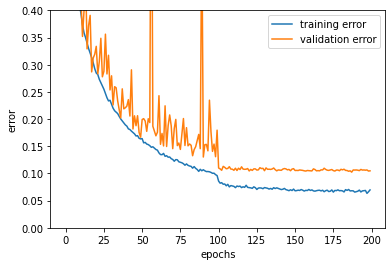

In [9]:
import matplotlib.pyplot as plt
plt.plot(1-log[1],label='training error')
plt.plot(1-log[2],label='validation error')
plt.ylim(0,0.4)
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()

In [10]:
total_time

21912.673411130905